# Content based filtering: cosine similarity model


In [1]:

import numpy as np 
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# In content based filtering we compute the similarity between vectors 
# so we will compute the similarity between movies based on movie['genres'],
#and it will suggest movie that are most similar to a particular movie based on genre

# loading the movie.csv
movies = pd.read_csv("Dataset/movies.csv", encoding= 'latin-1')

In [3]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# let's break the genre string into a list 
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')



In [5]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
4,5,Father of the Bride Part II (1995),['Comedy']


In [6]:
# Vectorization : By using TF-IDF
tf = TfidfVectorizer()
# Transform combined features into a numerical matrix
feature_matrix = tf.fit_transform(movies['genres'])
feature_matrix.shape

(3883, 20)

In [7]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(feature_matrix)

# Convert to a DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=movies['title'], columns=movies['title'])
print(similarity_df)

title                               Toy Story (1995)  Jumanji (1995)  \
title                                                                  
Toy Story (1995)                            1.000000        0.305525   
Jumanji (1995)                              0.305525        1.000000   
Grumpier Old Men (1995)                     0.197372        0.000000   
Waiting to Exhale (1995)                    0.260194        0.000000   
Father of the Bride Part II (1995)          0.344351        0.000000   
...                                              ...             ...   
Meet the Parents (2000)                     0.344351        0.000000   
Requiem for a Dream (2000)                  0.000000        0.000000   
Tigerland (2000)                            0.000000        0.000000   
Two Family House (2000)                     0.000000        0.000000   
Contender, The (2000)                       0.000000        0.000000   

title                               Grumpier Old Men (1995)  \


In [8]:
# Function to recommend movies
def recommend_movies(movie_title, similarity_df, n=5):
    similar_movies = similarity_df[movie_title].sort_values(ascending=False)
    recommendations = similar_movies.iloc[1:n+1]  # Exclude the movie itself
    return recommendations.index.tolist()

# Testing the recommendation system
movie = input("Enter Movie name : ").strip()
recommendations = recommend_movies(movie, similarity_df)

print(f"Top 5 : Recommendations for '{movie}' are: ")
for movie in recommendations:
    print(f"---> {movie}")

Enter Movie name :  Toy Story (1995)


Top 5 : Recommendations for 'Toy Story (1995)' are: 
---> Bug's Life, A (1998)
---> Rugrats Movie, The (1998)
---> American Tail: Fievel Goes West, An (1991)
---> Chicken Run (2000)
---> Toy Story 2 (1999)


Recommendations for 'Toy Story (1995)':
1. Bug's Life, A (1998)
2. Rugrats Movie, The (1998)
3. American Tail: Fievel Goes West, An (1991)
4. Chicken Run (2000)
5. Toy Story 2 (1999)

Performance Evaluation Metrics:
Precision: 0.80
Recall: 1.00
F1 Score: 0.89
Accuracy: 0.80

Confusion Matrix:
[[0 1]
 [0 4]]


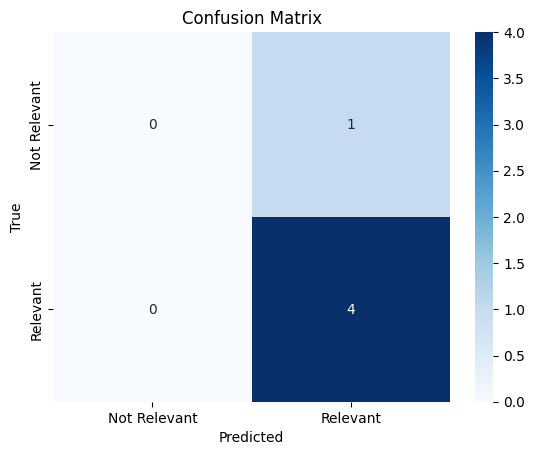

In [9]:
# Ground truth relevance for evaluation (example for "Toy Story (1995)")
ground_truth = {
    "Toy Story (1995)": [
        "Bug's Life, A (1998)",
        "Toy Story 2 (1999)",
        "Rugrats Movie, The (1998)",
        "Chicken Run (2000)",
        "The Incredibles (2004)"
    ]
}

# Evaluation: Calculate Precision, Recall, and F1-Score for "Toy Story (1995)"
movie_title = "Toy Story (1995)"
relevant_movies = ground_truth[movie_title]

# Get recommendations from the system
recommendations = recommend_movies(movie_title, similarity_df)

# Binary relevance: 1 for relevant, 0 for not relevant
y_true = [1 if rec in relevant_movies else 0 for rec in recommendations]
y_pred = [1] * len(recommendations)  # Assume all recommendations are marked as relevant by the system

# Precision, Recall, F1-Score, and Accuracy
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f"Recommendations for '{movie_title}':")
for idx, rec in enumerate(recommendations, start=1):
    print(f"{idx}. {rec}")

print("\nPerformance Evaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Relevant", "Relevant"], yticklabels=["Not Relevant", "Relevant"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Collaborative filetering: Singular Value Decomposition (SVD)

In [10]:
movies = pd.read_csv("Dataset/movies.csv", encoding = 'latin-1')
ratings = pd.read_csv("Dataset/ratings.csv", encoding = 'latin-1')

In [11]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [13]:
# Counting the number of unique users and movies
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print(f"Number of users = {n_users} | Number of movies = {n_movies}")

Number of users = 6040 | Number of movies = 3706


In [14]:
# Creating the user and item matirx where each row represent the users and each column represents the movies
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# normalization of user_item matrix
# Some users might rate most movies very highly (e.g., their average rating is 4 out of 5).
# Others might give generally low ratings (e.g., their average rating is 2 out of 5), even for movies they enjoy.
R = Ratings.to_numpy() # convert datafram to a numpy array 
user_ratings_mean = np.mean(R, axis = 1) # computing user rating mean()
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [16]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)
print ('The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens1M dataset is 95.5%


In [17]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 300)

# U represents how much each user aligns with the latent features.
# 𝑉𝑇 represents how much each movie aligns with the latent features.
# Σ indicates the strength of these features.
# k: Choosing k balances accuracy and computational efficiency.

In [18]:
sigma = np.diag(sigma) # converting sigma into a diagonal matrix

In [19]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [20]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.375545,0.468565,0.268948,0.148155,0.248369,0.067449,0.052107,-0.044917,-0.005476,-0.262715,...,0.063267,-0.015749,0.017837,-0.057629,-0.090795,0.023699,0.019788,-0.004879,0.114949,-0.064781
1,0.323968,-0.075414,0.080853,-0.060279,-0.018181,0.482344,0.304616,0.093385,0.153068,0.920041,...,0.118906,0.038888,0.002638,0.058189,0.046703,-1.202355,-0.366321,-0.004325,0.070247,0.194378
2,0.664902,0.288518,-0.092084,-0.031222,0.018036,-0.115966,-0.077861,-0.013052,-0.051177,1.030214,...,-0.028357,-0.021654,0.032003,0.023940,0.030984,0.168671,0.292010,0.071376,-0.002487,-0.153569
3,-0.218397,0.212863,-0.004960,0.019196,-0.003334,-0.132895,0.038890,-0.039544,0.036560,-0.091636,...,-0.049456,0.020780,0.014645,-0.040280,-0.041218,-0.082717,0.039356,-0.064852,0.013129,-0.157645
4,-0.574545,-0.307648,0.240915,0.045191,0.101497,1.076528,0.095850,0.027787,-0.067621,0.075499,...,0.292591,0.054142,0.007919,-0.069473,0.015145,0.086901,0.346042,0.005207,-0.014006,-0.036012


In [21]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [22]:
already_rated, predictions = recommend_movies(preds, 1310, movies, ratings, 20)

User 1310 has already rated 24 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [23]:
# Top 20 movies that User 1310 has rated 
already_rated.head(20)

,user_id,movie_id,rating,timestamp,title,genres
1,1310,1293,5,974781839,Gandhi (1982),Drama
7,1310,3683,5,974781935,Blood Simple (1984),Drama|Film-Noir
6,1310,2620,5,974781573,This Is My Father (1998),Drama|Romance
5,1310,2248,5,974781573,Say Anything... (1989),Comedy|Drama|Romance
15,1310,1704,5,974781573,Good Will Hunting (1997),Drama
3,1310,1299,4,974781701,"Killing Fields, The (1984)",Drama|War
8,1310,3685,4,974781935,Prizzi's Honor (1985),Comedy|Drama|Romance
4,1310,2243,4,974782001,Broadcast News (1987),Comedy|Drama|Romance
23,1310,1097,4,974781534,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
18,1310,3526,4,974781892,Parenthood (1989),Comedy|Drama


In [24]:
# Top 20 movies that User 1310 hopefully will enjoy
predictions

,movie_id,title,genres
1877,1957,Chariots of Fire (1981),Drama
1938,2020,Dangerous Liaisons (1988),Drama|Romance
3334,3424,Do the Right Thing (1989),Comedy|Drama
2833,2919,Year of Living Dangerously (1982),Drama|Romance
1919,2001,Lethal Weapon 2 (1989),Action|Comedy|Crime|Drama
1876,1956,Ordinary People (1980),Drama
2112,2194,"Untouchables, The (1987)",Action|Crime|Drama
1881,1962,Driving Miss Daisy (1989),Drama
1237,1263,"Deer Hunter, The (1978)",Drama|War
1273,1302,Field of Dreams (1989),Drama


# Model Evaluation

In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate evaluation metrics
def calculate_metrics(predictions, ground_truth):
    """
    Calculate evaluation metrics: MAE, RMSE, Precision, Recall, F1-Score, and Accuracy.

    Args:
        predictions (array): Predicted ratings
        ground_truth (array): Actual ratings

    Returns:
        dict: Metrics (MAE, RMSE, Precision, Recall, F1-Score, Accuracy)
    """
    # Flatten predictions and ground truth to make them 1D
    predictions_flat = predictions.flatten()
    ground_truth_flat = ground_truth.flatten()
    
    # Filter out unrated movies (ground truth = 0 means no rating)
    mask = ground_truth_flat > 0
    predictions_flat = predictions_flat[mask]
    ground_truth_flat = ground_truth_flat[mask]
    
    # MAE and RMSE
    mae = mean_absolute_error(ground_truth_flat, predictions_flat)
    rmse = np.sqrt(mean_squared_error(ground_truth_flat, predictions_flat))
    
    
    return {
        "MAE": mae,
        "RMSE": rmse,
    }

# Example usage
# Generate predictions and ground truth (for testing, we use Ratings_demeaned as ground truth)
ground_truth = Ratings_demeaned + user_ratings_mean.reshape(-1, 1)  # Actual ratings
ground_truth = np.clip(ground_truth, 0, 5)  # Ensure ratings are within the valid range (0-5)

metrics = calculate_metrics(all_user_predicted_ratings, ground_truth)
print("Evaluation Metrics for SVD-based Recommendation System:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Evaluation Metrics for SVD-based Recommendation System:
MAE: 1.2472
RMSE: 1.5967
